# Topic Modelling

Each week the CFPB sends thousands of consumers’ complaints about financial products and services to companies for response. Those complaints are published here after the company responds or after 15 days, whichever comes first. By adding their voice, consumers help improve the financial marketplace.

In [2]:
import os
import pandas as pd
import numpy as np
import datetime
import re

In [3]:
import matplotlib.pyplot as plt

In [4]:
import squarify

In [5]:
path = "C:\\Users\\Sruthi\\Downloads\\consumer_complaint"
os.chdir(path)

In [6]:
complaints = pd.read_csv("consumer_complaints.csv")

C:\Users\Sruthi\Anaconda3.7\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
complaints.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [31]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
date_received                   555957 non-null datetime64[ns]
product                         555957 non-null object
sub_product                     397635 non-null object
issue                           555957 non-null object
sub_issue                       212622 non-null object
consumer_complaint_narrative    66806 non-null object
company_public_response         85124 non-null object
company                         555957 non-null object
state                           551070 non-null object
zipcode                         551452 non-null object
tags                            77959 non-null object
consumer_consent_provided       123458 non-null object
submitted_via                   555957 non-null object
date_sent_to_company            555957 non-null datetime64[ns]
company_response_to_consumer    555957 non-null object
timely_response                 555957 non-null obj

### Distribution of Complaints

In [30]:
complaints['date_sent_to_company'] = pd.to_datetime(complaints['date_sent_to_company'], errors ='coerce')
complaints['date_received'] = pd.to_datetime(complaints['date_received'], errors ='coerce')

In [34]:
complaints['year']= complaints['date_sent_to_company'].dt.year
complaints['month']= complaints['date_sent_to_company'].dt.month

In [106]:
complaints_by_year = complaints['year'].value_counts().sort_values().reset_index()
complaints_by_year

,index,year
0,2011,2343
1,2016,51981
2,2012,71761
3,2013,107467
4,2014,153568
5,2015,168837


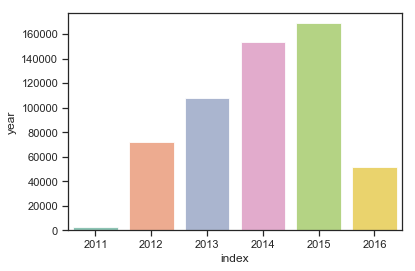

In [108]:

sns.barplot(x=complaints_by_year['index'], y =complaints_by_year['year'], palette='Set2', alpha = 0.8)

the data set recorded only few months from 2016 and 2011, hence reduced number of complaints.
Other wise there is a steady increase in the number of complaints sent to companies over time. 

In [63]:
complaints['date_sent_to_company'].max(), complaints['date_sent_to_company'].min()

(Timestamp('2016-04-25 00:00:00'), Timestamp('2011-12-01 00:00:00'))

# Distribution of complaints across companies

In [67]:
top_companies = pd.DataFrame(complaints['company'].value_counts()[:10])
top_companies

,company
Bank of America,55998
Wells Fargo & Company,42024
JPMorgan Chase & Co.,33881
Equifax,31828
Experian,30905
Citibank,25540
"TransUnion Intermediate Holdings, Inc.",25534
Ocwen,20978
Capital One,15628
Nationstar Mortgage,13250


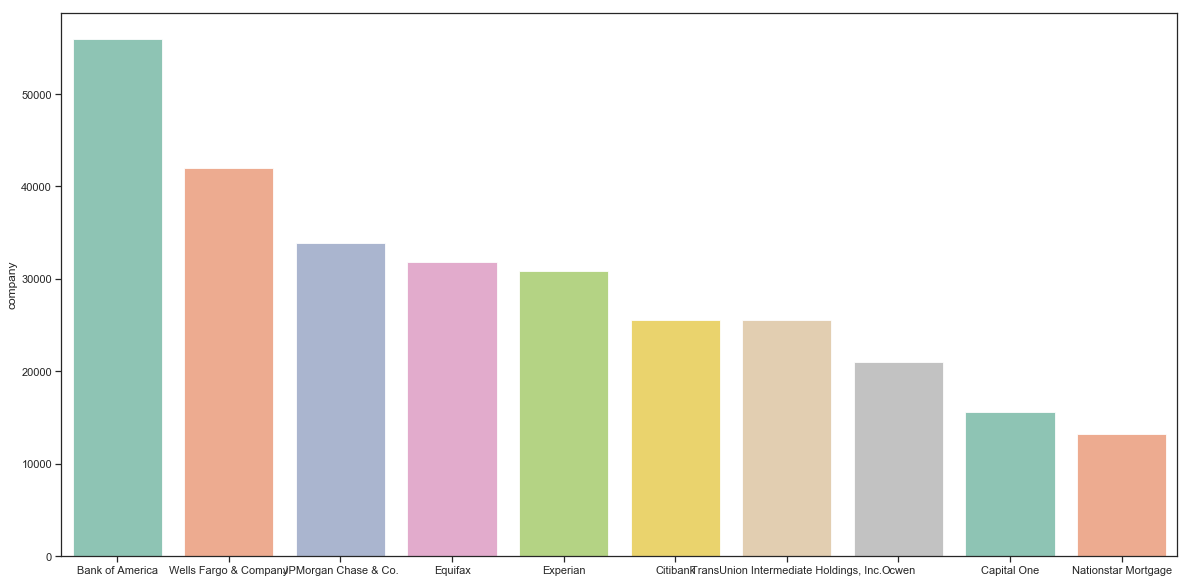

In [99]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=top_companies.index, y = top_companies['company'], palette='Set2',alpha =0.8)

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x= company, data= complaints)

# Distribution of complaints among products

#### The majority of complaints are reported in Mortgage followed by Debit Collection and Credit Reporting products

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

In [88]:
top_complaints = pd.DataFrame( complaints["product"].value_counts())

In [89]:
top_complaints

,product
Mortgage,186475
Debt collection,101052
Credit reporting,91854
Credit card,66468
Bank account or service,62563
Consumer Loan,20990
Student loan,15839
Payday loan,3877
Money transfers,3812
Prepaid card,2470


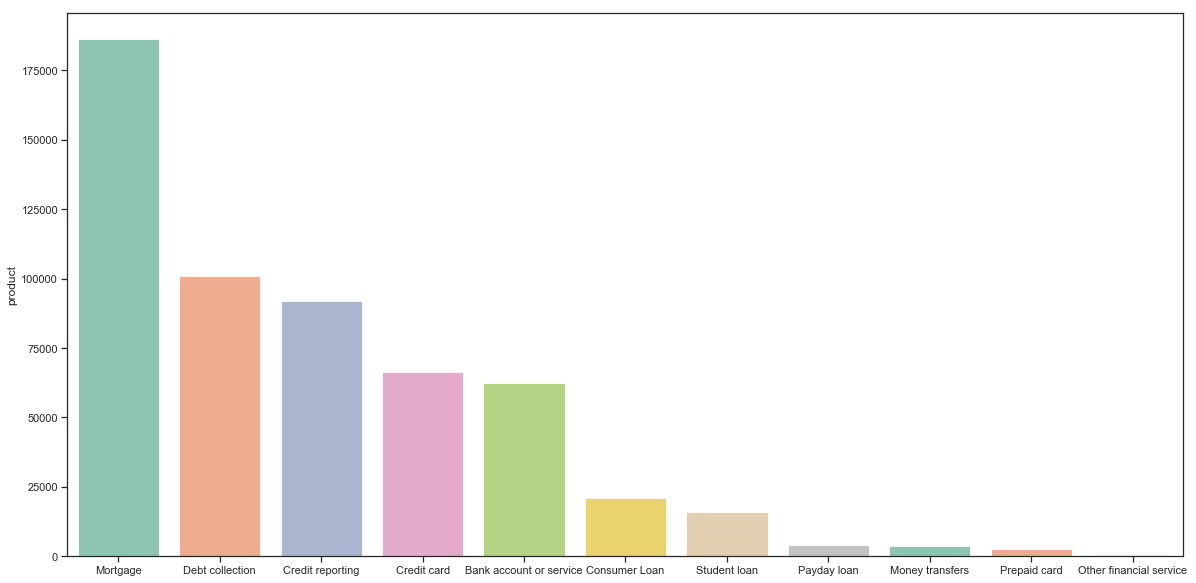

In [109]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=top_complaints.index, y = top_complaints['product'], alpha =0.8, palette='Set2')

In [129]:
top_company_complaints = complaints.groupby(["company",'product']).size().sort_values(ascending = False).reset_index(name='count')
top_company_complaints.head()

,company,product,count
0,Bank of America,Mortgage,36228
1,Equifax,Credit reporting,31694
2,Experian,Credit reporting,30768
3,"TransUnion Intermediate Holdings, Inc.",Credit reporting,25458
4,Wells Fargo & Company,Mortgage,25106


In [131]:
top_company_complaints[top_company_complaints['product']=='Mortgage'].head()

,company,product,count
0,Bank of America,Mortgage,36228
4,Wells Fargo & Company,Mortgage,25106
5,Ocwen,Mortgage,20388
6,JPMorgan Chase & Co.,Mortgage,16003
7,Nationstar Mortgage,Mortgage,12964


In [132]:
top_company_complaints[top_company_complaints['product']=='Debt collection'].head()

,company,product,count
19,Encore Capital Group,Debt collection,6010
25,"Portfolio Recovery Associates, Inc.",Debt collection,3234
31,ERC,Debt collection,2646
35,Citibank,Debt collection,2053
45,Synchrony Financial,Debt collection,1581


In [133]:
top_company_complaints[top_company_complaints['product']=='Credit reporting'].head()

,company,product,count
1,Equifax,Credit reporting,31694
2,Experian,Credit reporting,30768
3,"TransUnion Intermediate Holdings, Inc.",Credit reporting,25458
100,"Fidelity National Information Services, Inc. (...",Credit reporting,649
263,Capital One,Credit reporting,185


In [134]:
top_company_complaints[top_company_complaints['product']=='Credit card'].head()

,company,product,count
8,Citibank,Credit card,12245
10,Capital One,Credit card,10261
13,JPMorgan Chase & Co.,Credit card,7803
15,Bank of America,Credit card,7224
18,Synchrony Financial,Credit card,6646


# Distribution of companies response

Most of the complaints are responded in a timely manner and closed except for a few. 

In [136]:
response = complaints['company_response_to_consumer'].value_counts()
response

Closed with explanation            404293
Closed with non-monetary relief     70237
Closed with monetary relief         38262
Closed without relief               17909
Closed                              13399
Closed with relief                   5305
In progress                          3763
Untimely response                    2789
Name: company_response_to_consumer, dtype: int64

In [145]:
companies_response = complaints.groupby(['company','company_response_to_consumer']).size()

# Topic Modelling

In [147]:
# Load the regular expression library
import re
# Remove punctuation
complaints['issue'] = complaints['issue'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
complaints['issue'] = complaints['issue'].map(lambda x: x.lower())
# Print out the first rows of papers
complaints['issue'].head()

0    loan modificationcollectionforeclosure
1    loan servicing payments escrow account
2    incorrect information on credit report
3                        repaying your loan
4        false statements or representation
Name: issue, dtype: object

In [ ]:
Wordcloud shows terms related to loans and implies complaints raised against loan

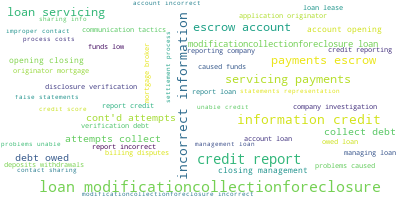

In [155]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(complaints['issue'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue', min_font_size=5)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

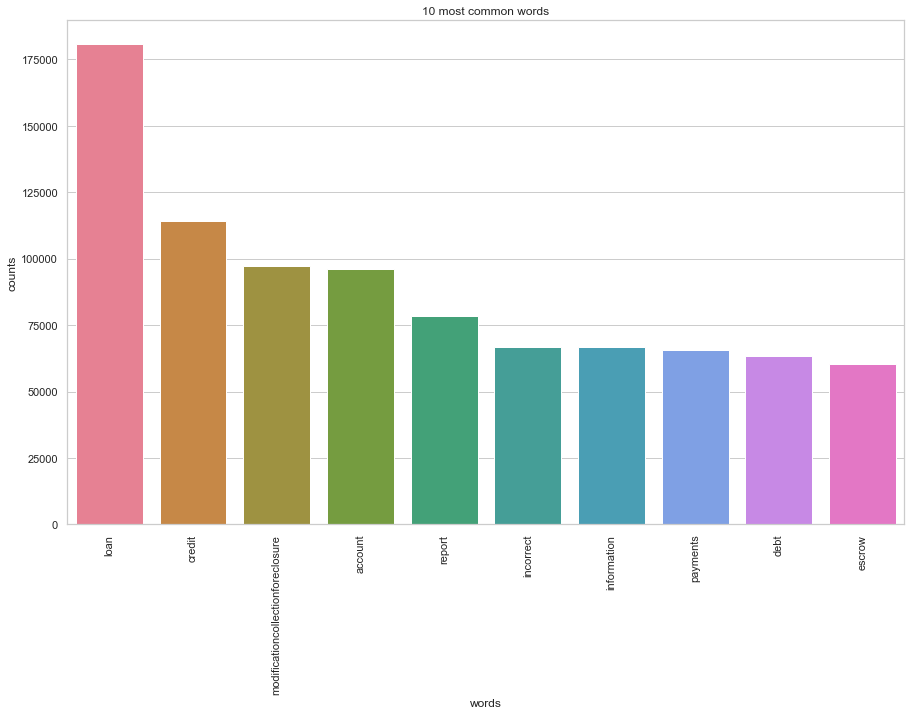

In [150]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(complaints["issue"])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

Topic Modelling is used to understand the thematic structure of documents/text data. Once the topic number is provided to the algorithm, it rearranges the topics distribution within the documents and the keyword distribution in the topics resulting in a relevant topic-key word distribution within the document. 

In [151]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 5
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
debt cont collect attempts owed

Topic #1:
payments account loan escrow servicing

Topic #2:
loan modificationcollectionforeclosure credit incorrect information

Topic #3:
withdrawals deposits identity fraud card

Topic #4:
credit reporting report billing disputes


The LDA topics further suggests loan and credit issues form a major theme among the complaints
